In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
import statistics  as sts
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
from sklearn.svm import SVC

In [2]:
#Data import
teste = pd.read_csv('test.csv')
treino = pd.read_csv('train.csv')

In [3]:
#Conbine train and test

treino_teste_data = [treino, teste]

In [4]:
#Check Data 
treino.describe()
treino



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#check Na
treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Na for cabin
treino.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
D              3
              ..
E10            1
C85            1
D9             1
C148           1
D15            1
Name: Cabin, Length: 147, dtype: int64

In [7]:
for data in treino_teste_data:
    data['Cabin'] = data['Cabin'].str[:1]
    

<AxesSubplot:>

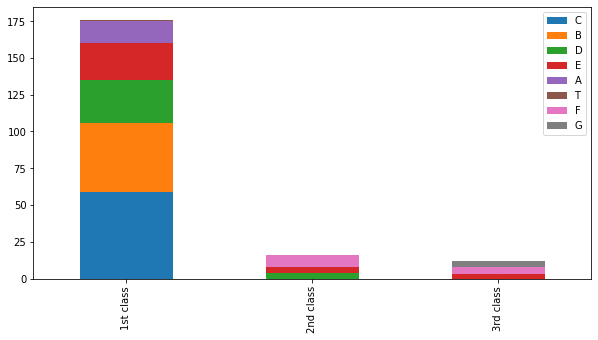

In [8]:
Pclass1 = treino[treino['Pclass']==1]['Cabin'].value_counts()
Pclass2 = treino[treino['Pclass']==2]['Cabin'].value_counts()
Pclass3 = treino[treino['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [9]:
# change cabin information to numeric
cabin_map = {"A": 0, "B": 0.5, "C": 1, "D": 1.5, "E": 2, "F": 2.5, "G": 3, "T": 3.5}
for dataset in treino_teste_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_map)


In [10]:
#fill NAs
treino["Cabin"].fillna(treino.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
teste["Cabin"].fillna(teste.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [11]:
treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.50,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1.00,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.50,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1.00,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.50,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,2.25,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0.50,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,2.50,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1.00,C


In [12]:
#Embarked
Embarked_group = data.groupby(['Embarked']).size()
Embarked_group
#S is more popular
treino['Embarked'].fillna('S', inplace = True)


In [13]:
# NAME

for data in treino_teste_data:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

treino['Title'].value_counts()
treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.50,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1.00,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.50,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1.00,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.50,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,2.25,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0.50,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,2.50,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1.00,C,Mr


In [14]:
# Change information to numeric

labelencoder = LabelEncoder()
treino["Title"] = labelencoder.fit_transform(treino["Title"])
teste["Title"] = labelencoder.fit_transform(teste["Title"])
treino["Sex"] = labelencoder.fit_transform(treino["Sex"])
teste["Sex"] = labelencoder.fit_transform(teste["Sex"])
treino["Title"] = labelencoder.fit_transform(treino["Title"])
teste["Title"] = labelencoder.fit_transform(teste["Title"])
treino["Embarked"] = labelencoder.fit_transform(treino["Embarked"])
teste["Embarked"] = labelencoder.fit_transform(teste["Embarked"])


In [15]:
# NA for age
treino['Age'].describe()
treino["Age"].fillna(treino.groupby("Title")["Age"].transform("median"), inplace=True)
teste["Age"].fillna(teste.groupby("Title")["Age"].transform("median"), inplace=True)
 




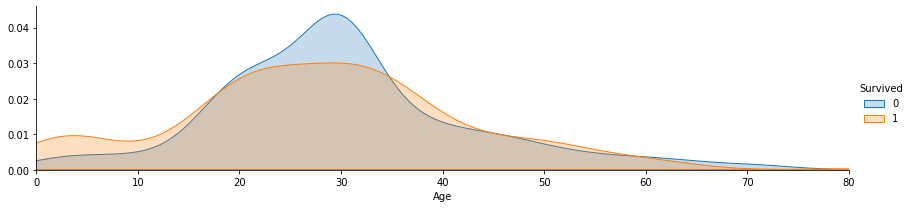

In [16]:
facet = sns.FacetGrid(treino, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, treino['Age'].max()))
facet.add_legend()

plt.show()

In [17]:
#Create a sub groups to AGE

r = [0,15,30,45,65]
g = [  'Child','Teen','Adult','Elderly']
treino['AgeCtg'] = pd.cut(treino['Age'], bins = r, labels = g)
teste['AgeCtg'] = pd.cut(teste['Age'], bins = r, labels = g)

treino["AgeCtg"] = labelencoder.fit_transform(treino["AgeCtg"].astype(str))
teste["AgeCtg"] = labelencoder.fit_transform(teste["AgeCtg"].astype(str))



In [18]:
treino['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [19]:
#Remove any NaN from the test
teste.isnull().sum()
teste['Fare'].mean()
teste['Fare'].fillna(35.6, inplace = True)


x = [0,17,30,100]
z = ["a","b","c"]
treino['FareCtg'] = pd.cut(treino['Fare'], bins = x, labels = z)
teste['FareCtg'] = pd.cut(teste['Fare'], bins = x, labels = z)

treino['FareCtg'] = treino['FareCtg'].astype('string')
teste['FareCtg'] = teste['FareCtg'].astype('string')

treino["FareCtg"] = labelencoder.fit_transform(treino["FareCtg"].astype(str))
teste["FareCtg"] = labelencoder.fit_transform(teste["FareCtg"].astype(str))


treino = treino.drop(['Fare'], axis = 1)
teste = teste.drop(['Fare'], axis = 1)
#treino['FareCtg']

In [20]:
# Drop  ticket/ name/ age/ fare

treino = treino.drop(columns = ["Ticket"])
teste = teste.drop(columns = ["Ticket"])

treino = treino.drop(columns = ["Name"])
teste = teste.drop(columns = ["Name"])

treino = treino.drop(columns = ["Age"])
teste = teste.drop(columns = ["Age"])


In [21]:
treino

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,AgeCtg,FareCtg
0,1,0,3,1,1,0,2.50,2,12,3,1
1,2,1,1,0,1,0,1.00,0,13,0,3
2,3,1,3,0,0,0,2.50,2,9,3,1
3,4,1,1,0,1,0,1.00,2,13,0,3
4,5,0,3,1,0,0,2.50,2,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,2.25,2,15,3,1
887,888,1,1,0,0,0,0.50,2,9,3,2
888,889,0,3,0,1,2,2.50,2,9,3,2
889,890,1,1,1,0,0,1.00,0,12,3,2


In [22]:
#Divide target from data
treino_data = treino.drop(['Survived'], axis = 1)
treino_target = treino['Survived']

treino_data.shape, treino_target.shape

((891, 10), (891,))

In [23]:
teste

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,AgeCtg,FareCtg
0,892,3,1,0,0,2.5,1,5,0,1
1,893,3,0,1,0,2.5,2,6,2,1
2,894,2,1,0,0,2.5,1,5,2,1
3,895,3,1,0,0,2.5,2,5,3,1
4,896,3,0,1,1,2.5,2,6,3,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,0,0,2.5,2,5,3,1
414,1306,1,0,0,0,1.0,0,1,0,0
415,1307,3,1,0,0,2.5,2,5,0,1
416,1308,3,1,0,0,2.5,2,5,3,1


In [24]:
#Random Forrest
Rf = RandomForestClassifier(n_estimators= 10000)
Rf.fit(treino_data, treino_target)

prediction = Rf.predict(teste)


In [25]:
submission = pd.DataFrame({
        "PassengerId": teste["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [26]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [27]:
#SoftMax
softmax_reg= LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(treino_data, treino_target)

c:\users\lucas\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [28]:
softmax_prediction= softmax_reg.predict(teste)
submission2 = pd.DataFrame({
        "PassengerId": teste["PassengerId"],
        "Survived": softmax_prediction
    })

submission2.to_csv('submission2.csv', index=False)


In [29]:
submission2 = pd.read_csv('submission2.csv')
submission2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [30]:
svc = SVC()
svc.fit(treino_data, treino_target)
svc_pred = svc.predict(teste)

submission3 = pd.DataFrame({
        "PassengerId": teste["PassengerId"],
        "Survived": prediction
    })

submission3.to_csv('submission3.csv', index=False)


In [31]:
submission3 = pd.read_csv('submission3.csv')
submission3.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
